<a href="https://colab.research.google.com/github/Manish-k723/Weather-Prediction/blob/main/Major_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od
od.version()

# **Defining Dataset and creating DataFrame**

In [ ]:
dataset_url = ('https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package')
od.download(dataset_url)

In [ ]:
import os

In [ ]:
data_dir = '/content/weather-dataset-rattle-package'
os.listdir(data_dir)

In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv('/content/weather-dataset-rattle-package/weatherAUS.csv')
df.tail()

In [ ]:
df.size # So, we have total of 23 columns out of which last column is our targetted output and first column that is Date, is not going to be in use for prediction

In [ ]:
df.info()

In [ ]:
df.isnull().sum()#Lot of Null values are there and also lot of Nulll values in our tagetted column which is not good thing for our model and model will not 
# get anything to learn from those data, so we are going to remove those data rows. Also Rain today column is also a crucial thing for us, so that's why we are going to the 
# rows having Null values in rain today column also

In [ ]:
df.dropna(subset=['RainToday','RainTomorrow'],inplace=True)

In [ ]:
df.info()

In [ ]:
df.isnull().sum() #Required and targetted columns have 0 NULL values.

# **Some EDA on the Dataset**

Before training a ML model, It is always a good idea to perform some EDA on the dataset.
so, we get to know how the distributions are related to the targetted column 

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import plotly.express as px
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(10,6)


In [41]:
%%time
px.histogram(df,x='Location',title='Location VS rainy days',color= 'RainToday')

CPU times: user 828 ms, sys: 29.6 ms, total: 857 ms
Wall time: 856 ms


In [ ]:
df.groupby(['Location','RainToday']).size()

In [ ]:
df.Location.nunique()

In [ ]:
print(df.WindGustDir.unique())
print(df.WindGustDir.nunique())


In [37]:
px.histogram(df,x='Temp3pm',title='Temp3pm VS Rain Tomorrow',color = 'RainTomorrow')
#It is clear from the graph when the temperature is low, there is more chances of raining tomorrow

In [38]:
px.histogram(df,x='Pressure3pm',title='Pressure3pm VS Rain Tomorrow',color = 'RainTomorrow')
#When there is low pressure at 3 pm then there is so likely to have rain tomorrow

In [39]:
px.histogram(df,x='RainToday',title='RainToday VS Rain Tomorrow',color = 'RainTomorrow')

In [40]:
px.scatter(df.sample(10000),title=' Maxtemp vs Mintemp',x= 'MinTemp', y='MaxTemp',color='RainToday')
# From graph it is clear that when there is small variation of temperature in a day then there is more chances of raining on that day.

In [36]:
px.scatter(df.sample(1000),title=' Maxtemp vs Mintemp',x= 'MinTemp', y='MaxTemp',color='RainTomorrow')
# From graph it can be seen that if there is small variation of temperature on a day then it is more likely to have rain tomorrow but there are also many
# exception cases, So it can't be simply said that temperature variation of today can predict tomorrow's raining chances.

In [ ]:
px.strip(df.sample(2000), title = 'Humidity at 3pm vs Temperature at 3pm',x='Temp3pm',y='Humidity3pm',color='RainToday')
# More chances of rain when humidity at 3PM is high and temperature is low about less than 25

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text major ticklabel objects>)

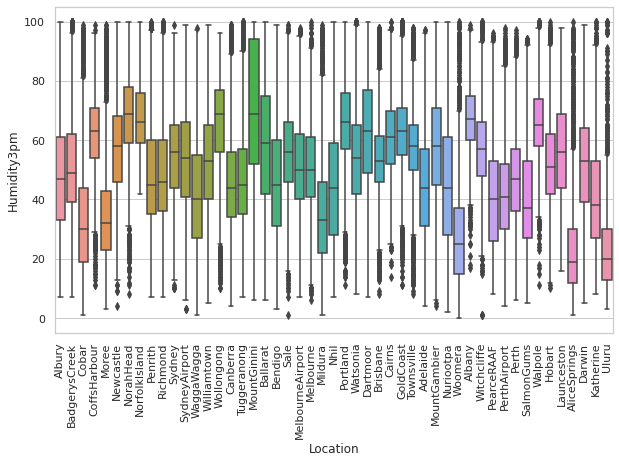

In [47]:
sns.set(style='whitegrid')
 
sns.boxplot(x="Location",
                y="Humidity3pm",
                data=df)
plt.xticks(rotation=90)

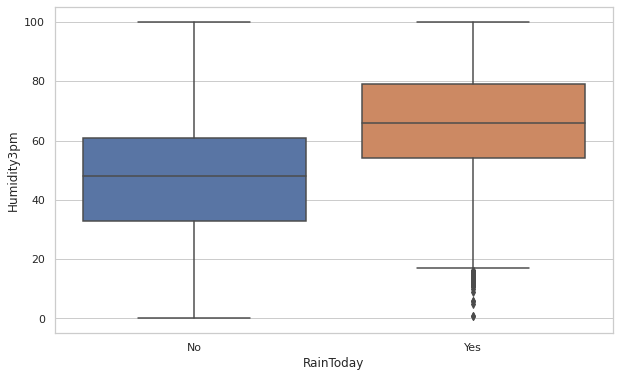

In [49]:
sns.set(style='whitegrid')
 
sns.boxplot(x="RainToday",
                y="Humidity3pm",
                data=df)

In [ ]:
px.histogram(df,x='WindGustSpeed',title='Wind speed vs Rain today',color='RainToday')
# Both these are not too much related but if wind speed is high (>90) today then it is more likely to rain

In [ ]:
px.strip(df.sample(2000), title = 'Humidity at 3pm vs Temperature at 3pm of yesterday',x='Temp3pm',y='Humidity3pm',color='RainTomorrow')
# Not so conclusive graph

In [ ]:
!pip install jovian --upgrade --quiet

In [ ]:
import jovian

In [ ]:
# jovian.commit()

In [ ]:
# If we have lot of data then there is so much chances that due to huge data our Speed in training the model will reduce bcz of run time 
# so for that we can use fraction of data to train the model and it will help me to get the result faster and later for accuracy I can use whole data by removing those commands
# syntax for that purpose
use_sample = False # here if i will raplace false with true than a sample data of 10% of original data get created.
sample_frac=0.1
if use_sample:
  df = df.sample(frac=sample_frac).copy()
# Note if using sample data- Make sure to Change true with false and re-run the cell to get accuracy

In [ ]:
# While building real-world machine learning models, it is quite common to split the dataset into three parts:

#     1. Training set - used to train the model, i.e., compute the loss and adjust the model's weights using an optimization technique.
#             It it the set which we use to learn
#     2. Validation set - used to evaluate the model during training, tune model hyperparameters (optimization technique, regularization etc.).
#           In simple it is the set which is use to check and improve ourself
#         and pick the best version of the model. Picking a good validation set is essential for training models that generalize well. Learn more here.
#     3. Test set - used to compare different models or approaches and report the model's final accuracy. For many datasets,
#         test sets are provided separately. The test set should reflect the kind of data the model will encounter in the real-world, as closely as feasible.
#           It is the set which is used to check use

# As a general rule of thumb you can use around 60% of the data for the training set, 20% for the validation set and 20% for the test set. 
# If a separate test set is already provided, you can use a 75%-25% training-validation split.

# When rows in the dataset have no inherent order, it's common practice to pick random subsets of rows for creating test and validation sets. 
# This can be done using the train_test_split utility from scikit-learn.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=42) #In this line we have created two dataframes i.e. training and test dataframes and
# as specified in above paranthesis out of test_df is getting 20% of whole data and train_val_df is getting 80% of the whole data.
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)
# Here again we are splitting the training data in two categories that is training set and validation set and 
# setting validation set with 25 % of the training data frame anf 75% of that to train_df

In [ ]:
print('Size of training dataset',train_df.shape)
print('Size of Validation dataset',val_df.shape)
print('Size of Test dataset',test_df.shape)


In [ ]:
# However, while working with dates, it's often a better idea to separate the training, validation and test sets with time, 
# so that the model is trained on data from the past and evaluated on data from the future.

# # For the current dataset, we can use the Date column in the dataset to create another column for year. 
# We'll pick the last two years for the test set, and one year before it for the validation set.

In [ ]:
plt.title('No.of rows per years')
sns.countplot(x=pd.to_datetime(df.Date).dt.year)

# plt.title('No.of rows per Month')
# sns.countplot(x=pd.to_datetime(df.Date).dt.month)

# plt.title('No.of rows per Month')
# sns.countplot(x=pd.to_datetime(df.Date).dt.day)

In [ ]:
# So, for the purpose that I have described above I am going to create new data frame
year = pd.to_datetime(df.Date).dt.year

train_df = df[year<2015]
val_df = df[year==2015]
test_df = df[year>2015]

print(train_df.shape,val_df.shape,test_df.shape) # Here it seems that I haven't divided the data in exact proportion of 60,20,20 but
#  I have ensured that I am using All the three data sets for atleast a year(covers all season) and also divided data in such a way that data gets evaluated
#  on basis of latest data and get trained from past data.

# **Identifying Inpurt and Target columns**

Often, not all the columns in a dataset are useful for training a model. In the current dataset, we can ignore the Date column, since we only want to weather conditions to make a prediction about whether it will rain the next day. Because date here is like unique column for all entry and it will not help in training the model. So, whenever training a ML model ignore unique value column.

In [ ]:
# # Using simple slicing
# train_input= train_df.iloc[:,1:22] 
# train_target= train_df.iloc[:,23]

# val_input= val_df.iloc[:,1:-1] 
# val_target= val_df.iloc[:,-1]

# test_input= test_df.iloc[:,1:-1] 
# test_target= test_df.iloc[:,-1]



input_col= list(df.columns)[1:-1]
Target_col='RainTomorrow'

train_input= train_df[input_col].copy()
train_target = train_df[Target_col].copy()

val_input= val_df[input_col].copy()
val_target = val_df[Target_col].copy()

test_input= test_df[input_col].copy()
test_target = test_df[Target_col].copy()


In [ ]:
train_input

In [ ]:
import numpy as np

In [ ]:
numeric_col = train_input.select_dtypes(include=np.number).columns.tolist()
cate_col = train_input.select_dtypes('object').columns.tolist()

In [ ]:
print(numeric_col)
print(cate_col)

In [ ]:
train_input[numeric_col].describe()

In [ ]:
train_input[cate_col].nunique()

# **Imputing Missing Numeric Data**

Machine learning models can't work with missing numerical data. The process of filling missing values is called imputation.

When there is a NaN value, so most prolly the model is going to crash on that so we have to fill that. and process of filling it is known as imputation.


There are several techniques for imputation, but we'll use the most basic one: replacing missing values with the average value in the column using the SimpleImputer class from sklearn.impute.

In [ ]:
from sklearn.impute import SimpleImputer 

In [ ]:
imputer = SimpleImputer(strategy='mean')

In [ ]:
# ?SimpleImputer #Syntax to check what else a module can to, Like an tutorial

In [ ]:
df[numeric_col].isna().sum() #To check how many Missing values are there in numeric columns

These values are spread across the training, test and validation sets. You can also check the no. of missing values individually for train_inputs, val_inputs and test_inputs.

In [ ]:
train_input[numeric_col].isna().sum()

In [ ]:
imputer.fit(df[numeric_col])

In [ ]:
list(imputer.statistics_)

The missing values in the training, test and validation sets can now be filled in using the transform method of imputer.



In [ ]:
train_input[numeric_col]=imputer.transform(train_input[numeric_col])
val_input[numeric_col]=imputer.transform(val_input[numeric_col])
test_input[numeric_col]=imputer.transform(test_input[numeric_col])

#The missing values in each column is filled with mean value of that column

In [ ]:
train_input[numeric_col].isna().sum()

In [ ]:
# train_input[cate_col].isna().sum()
val_input[numeric_col].isna().sum()

# **SCALING NUMERIC FEATURES**

Another good practice is to scale numeric features to a small range of values e.g. \((0,1)\) or \((-1,1)\). Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss. Optimization algorithms also work better in practice with smaller numbers.

In simple words for my understanding, It is important because ultimately ML model puts the values in some formula of arithmetics to calculate loss or others. And higher these loss worse the efficiency of the model. So for that purpose we do scaling so we bring all the values in some small set or range.

In [ ]:
df[numeric_col].describe()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# ?MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(df[numeric_col])

In [ ]:
print('Minimum:')
list(scaler.data_min_)

In [ ]:
print('Maximum:')
list(scaler.data_max_)

In [ ]:
train_input[numeric_col]=scaler.transform(train_input[numeric_col])
val_input[numeric_col]=scaler.transform(val_input[numeric_col])
test_input[numeric_col]=scaler.transform(test_input[numeric_col])

In [ ]:
train_input[numeric_col]

In [ ]:
train_input[numeric_col].describe()



## Encoding Categorical Data

Since machine learning models can only be trained with numeric data, we need to convert categorical data to numbers. A common technique is to use one-hot encoding for categorical columns.

<img src="https://i.imgur.com/n8GuiOO.png" width="640">

One hot encoding involves adding a new binary (0/1) column for each unique category of a categorical column. 

In [ ]:
df[cate_col].nunique()

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# ?OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse= False,handle_unknown='ignore')

we fit the encoder to the data i.e. identify the full list of categories across all categorical columns.



In [ ]:
encoder.fit(df[cate_col])
df[cate_col].fillna('Unknown')

In [ ]:
encoder.categories_

In [ ]:
encode_col= list(encoder.get_feature_names_out(cate_col))
print(encode_col)

In [ ]:
train_input[encode_col] = encoder.transform(train_input[cate_col])
val_input[encode_col] = encoder.transform(val_input[cate_col])
test_input[encode_col] = encoder.transform(test_input[cate_col])

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
test_input

In [ ]:
print('Training input set',train_input.shape)
print('Training Target set',train_target.shape)
print('Validation input set',val_input.shape)
print('Validation Target set',val_target.shape)
print('Test input set',test_input.shape)
print('Test Target set',test_target.shape)

# **Saving Processed Data to Disk**
It can be useful to save processed data to disk, especially for really large datasets, to avoid repeating the preprocessing steps every time you start the Jupyter/colab notebook. The parquet format is a fast and efficient format for saving and loading Pandas dataframes.Saving the output is a very helpful thing. We can download the parquet file and use that late without going through the same preprocessing.

In [ ]:
!pip install pyarrow --quiet

In [ ]:
train_input.to_parquet('train_input.parquet')
val_input.to_parquet('val_input.parquet')
test_input.to_parquet('test_input.parquet')

In [ ]:
pd.DataFrame(train_target).to_parquet('train_target.parquet')
pd.DataFrame(val_target).to_parquet('val_target.parquet')
pd.DataFrame(test_target).to_parquet('test_target.parquet')

In [ ]:
train_input = pd.read_parquet('train_input.parquet')
train_target = pd.read_parquet('train_target.parquet')
val_input = pd.read_parquet('val_input.parquet')
val_target = pd.read_parquet('val_target.parquet')
test_input = pd.read_parquet('test_input.parquet')
test_target = pd.read_parquet('test_target.parquet')

In [ ]:
print('Training input set',train_input.shape)
print('Training Target set',train_target.shape)
print('Validation input set',val_input.shape)
print('Validation Target set',val_target.shape)
print('Test input set',test_input.shape)
print('Test Target set',test_target.shape)

## Training a Logistic Regression Model

Logistic regression is a commonly used technique for solving binary classification problems. In a logistic regression model: 

- we take linear combination (or weighted sum of the input features) 
- we apply the sigmoid function to the result to obtain a number between 0 and 1
- this number represents the probability of the input being classified as "Yes"
- instead of RMSE, the cross entropy loss function is used to evaluate the results


Here's a visual summary of how a logistic regression model is structured ([source](http://datahacker.rs/005-pytorch-logistic-regression-in-pytorch/)):


<img src="https://i.imgur.com/YMaMo5D.png" width="480">

The sigmoid function applied to the linear combination of inputs has the following formula:

<img src="https://i.imgur.com/sAVwvZP.png" width="400">

To train a logistic regression model, we can use the `LogisticRegression` class from Scikit-learn.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(solver='liblinear')

In [ ]:
%%time
model.fit(train_input[numeric_col + encode_col], train_target)
# Here I haven't used the train_input itself directly because it contains categorical data till, we haven't removed those columns. So, to get rid of that I have played a trick
# and only given the required columns.

In [ ]:
train_input[numeric_col +encode_col]

#`model.fit`
 uses the following workflow for training the model ([source](https://www.deepnetts.com/blog/from-basic-machine-learning-to-deep-learning-in-5-minutes.html)):

1. We initialize a model with random parameters (weights & biases).
2. We pass some inputs into the model to obtain predictions.
3. We compare the model's predictions with the actual targets using the loss function.  
4. We use an optimization technique (like least squares, gradient descent etc.) to reduce the loss by adjusting the weights & biases of the model
5. We repeat steps 1 to 4 till the predictions from the model are good enough.


<img src="https://www.deepnetts.com/blog/wp-content/uploads/2019/02/SupervisedLearning.png" width="480">

For a mathematical discussion of logistic regression, sigmoid activation and cross entropy, check out [this YouTube playlist](https://www.youtube.com/watch?v=-la3q9d7AKQ&list=PLNeKWBMsAzboR8vvhnlanxCNr2V7ITuxy&index=1). Logistic regression can also be applied to multi-class classification problems, with a few modifications.

In [ ]:
print(model.coef_.tolist()) #These are the weights of the values that are given to those columns in that ML-Logistic Regression model formula
#For example, in the observation below, we can see that Max-temp has a weight of -2.8 which is also obvious because if there is high temp today
# then there is less likely to have rain tomorrow, We had already gained this result from our EDA. and same with rainfall

In [ ]:
feature_df= pd.DataFrame({
               'feature' : (numeric_col +encode_col),
               'Weights' : model.coef_.tolist()[0]
})
# The higher the weight which means the more Raining tomorrow depends on that feature and vice versa

In [ ]:
# plt.figure(figsize=(50,20))
sns.barplot(data=feature_df.sort_values('Weights',ascending= False).head(10),x='feature',y='Weights')
plt.xticks(rotation=90)

In [ ]:
print(model.intercept_)
#Each weight is applied to the value in a specific column of the input. Higher the weight, greater the impact of the column on the prediction.

# **Making Predictions and Evaluation**


In [ ]:
x_train = train_input[numeric_col + encode_col]
x_val = val_input[numeric_col + encode_col]
x_test = test_input[numeric_col + encode_col]

In [ ]:
train_pred = model.predict(x_train)
train_pred
# list(train_pred)

In [ ]:
# jovian.commit()

In [ ]:
train_target

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(train_target,train_pred)*100

In [ ]:
train_prob = model.predict_proba(x_train)
train_prob

In [ ]:
pd.DataFrame(train_prob)


In [ ]:
# Waste
# px.histogram(,x=1,title = 'Rain values')
# # sns.barplot(data=feature_df.sort_values('Weights',ascending= False).head(10),x='feature',y='Weights')
# sns.barplot(data=prob_df.sort_values(1,ascending= False).head(10),y=1)

In [ ]:
model.classes_

The model achieves an accuracy of 85.1% on the training set. We can visualize the breakdown of correctly and incorrectly classified inputs using a confusion matrix.

<img src="https://i.imgur.com/UM28BCN.png" width="480">

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(train_target,train_pred, normalize = 'true')
# The output of this cell is an important factor to check accuracy and predictiveness of the model.
# As in the image above this cell describing, the same thing is deisplyed by the matric which is that, if we are a set values whose anser is no then 94% 
# of the time, model is predicting it correctly and 6% of the time it is giving a Yes for actual no which is not that much bad but when we are giving the model
# the set of values whose result should be Yes then 48% of the time it is giving NO and only 52% of the time it is correct which is not ok.

In [ ]:
def pred_plot(inputs,targets,name=''):
  preds= model.predict(inputs)

  accuracy = accuracy_score(targets,preds)*100
  print("Accuracy: {: .2f} %".format(accuracy))
  cf= confusion_matrix(targets,preds,normalize='true') 
  plt.figure()
  sns.heatmap(cf,annot=True)
  plt.xlabel = 'Prediction'
  plt.ylabel = 'Target'
  plt.title('{} Confusion Matrix'.format(name));

  return preds



In [ ]:
train_preds = pred_plot(x_train , train_target , 'Training')
# Dark or Light area means good and light values are problemetic

In [ ]:
val_preds = pred_plot(x_val , val_target , 'Training')

In [ ]:
test_preds = pred_plot(x_test , test_target , 'Training')

The accuracy of the model on the test and validation set are above 84%, which suggests that our model generalizes well to data it hasn't seen before. 

But how good is 84% accuracy? While this depends on the nature of the problem and on business requirements, a good way to verify whether a model has actually learned something useful is to compare its results to a "random" or "dumb" model.

Let's create two models: one that guesses randomly and another that always return "No". Both of these models completely ignore the inputs given to them.

In [ ]:
def random_guess(inputs):
  return np.random.choice(['No','Yes'], len(inputs))

In [ ]:
def All_no(inputs):
  return np.full(len(inputs),'No')

In [ ]:
accuracy_score(test_target,random_guess(x_test))

In [ ]:
accuracy_score(test_target,All_no(x_test))

# **Predicting for single input**

In [ ]:
new_input = {'Date': '2021-06-19',
             'Location': 'Katherine',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 24.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}
# The first step is to convert the dictionary into a Pandas dataframe, similar to `raw_df`.
# This can be done by passing a list containing the given dictionary to the `pd.DataFrame` constructor.

In [ ]:
new_df = pd.DataFrame([new_input])
new_df

In [ ]:
new_df[numeric_col] = imputer.transform(new_df[numeric_col])
new_df[numeric_col] = scaler.transform(new_df[numeric_col])
new_df[encode_col] = encoder.transform(new_df[cate_col])
#Execute these type of cell one time only because execution of it repeatedly can over-scale the values.

In [ ]:
new_df

In [ ]:
x_new_input = new_df[numeric_col + encode_col]
x_new_input

In [ ]:
model.predict(x_new_input)

In [ ]:
model.predict_proba(x_new_input)

In [ ]:
def prediction(inputs):
  new_input = pd.DataFrame([inputs])

  new_input[numeric_col] = imputer.transform(new_input[numeric_col])
  new_input[numeric_col] = scaler.transform(new_input[numeric_col])
  new_input[encode_col] = encoder.transform(new_input[cate_col])

  x_new_input = new_input[numeric_col + encode_col]

  pred = model.predict(x_new_input)
  probailities = model.predict_proba(x_new_input)[0][list(model.classes_).index(pred)]

  return pred , probailities

In [ ]:
new_input1 = {'Date': '2021-06-19',
             'Location': 'Witchcliffe',
             'MinTemp': 13.2,
             'MaxTemp': 23.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNE',
             'WindGustSpeed': 60.0,
             'WindDir9am': 'NNW',
             'WindDir3pm': 'NW',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 38.0,
             'Humidity3pm': 36.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1002.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'No'}

prediction(new_input1)


## **Saving and Loading Trained Models**

We can save the parameters (weights and biases) of our trained model to disk, so that we needn't retrain the model from scratch each time we wish to use it. Along with the model, it's also important to save imputers, scalers, encoders and even column names. Anything that will be required while generating predictions using the model should be saved.

We can use the `joblib` module to save and load Python objects on the disk. 

In [ ]:
import joblib

In [ ]:
aussie_rain = {
    'model': model,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_col,
    'target_col': Target_col,
    'numeric_cols': numeric_col,
    'categorical_cols': cate_col,
    'encoded_cols': encode_col
}

In [ ]:
joblib.dump(aussie_rain,'aussie_rain.joblib')

In [ ]:
aussie_model2 = joblib.load('aussie_rain.joblib')

In [ ]:
aussie_model2['model'].coef_

In [ ]:
test_pred2 = aussie_model2['model'].predict(x_test)
accuracy_score(test_target,test_pred2)*100

In [ ]:
# jovian.commit(output=['aussie_model2'])

## **Putting it all Together**

While we've covered a lot of ground in this tutorial, the number of lines of code for processing the data and training the model is fairly small. Each step requires no more than 3-4 lines of code.

In [ ]:
import opendatasets as od
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Download the dataset
od.download('https://www.kaggle.com/jsphyg/weather-dataset-rattle-package')
raw_df = pd.read_csv('weather-dataset-rattle-package/weatherAUS.csv')
raw_df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

# Create training, validation and test sets
year = pd.to_datetime(raw_df.Date).dt.year
train_df, val_df, test_df = raw_df[year < 2015], raw_df[year == 2015], raw_df[year > 2015]

# Create inputs and targets
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'
train_inputs, train_targets = train_df[input_cols].copy(), train_df[target_col].copy()
val_inputs, val_targets = val_df[input_cols].copy(), val_df[target_col].copy()
test_inputs, test_targets = test_df[input_cols].copy(), test_df[target_col].copy()

# Identify numeric and categorical columns
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()[:-1]
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

# Impute missing numerical values
imputer = SimpleImputer(strategy = 'mean').fit(raw_df[numeric_cols])
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

# Scale numeric features
scaler = MinMaxScaler().fit(raw_df[numeric_cols])
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

# One-hot encode categorical features
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(raw_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names(categorical_cols))
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

# Save processed data to disk
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')
pd.DataFrame(test_targets).to_parquet('test_targets.parquet')

# Load processed data from disk
train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')
test_inputs = pd.read_parquet('test_inputs.parquet')
train_targets = pd.read_parquet('train_targets.parquet')[target_col]
val_targets = pd.read_parquet('val_targets.parquet')[target_col]
test_targets = pd.read_parquet('test_targets.parquet')[target_col]

### **Model Training and Evaluation**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib

# Select the columns to be used for training/prediction
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

# Create and train the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, train_targets)

# Generate predictions and probabilities
train_preds = model.predict(X_train)
train_probs = model.predict_proba(X_train)
accuracy_score(train_targets, train_preds)

# Helper function to predict, compute accuracy & plot confustion matrix
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));    
    return preds

# Evaluate on validation and test set
val_preds = predict_and_plot(X_val, val_targets, 'Validation')
test_preds = predict_and_plot(X_test, test_targets, 'Test')

# Save the trained model & load it back
aussie_rain = {'model': model, 'imputer': imputer, 'scaler': scaler, 'encoder': encoder,
               'input_cols': input_cols, 'target_col': target_col, 'numeric_cols': numeric_cols,
               'categorical_cols': categorical_cols, 'encoded_cols': encoded_cols}
joblib.dump(aussie_rain, 'aussie_rain.joblib')
aussie_rain2 = joblib.load('aussie_rain.joblib')

In [ ]:
def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    pred = model.predict(X_input)[0]
    prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
    return pred, prob

new_input = {'Date': '2021-06-19',
             'Location': 'Launceston',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

predict_input(new_input)